##### Algunas definiciones básicas

La Oficina de Estadísticas Laborales de los Estados Unidos ha definido los conceptos básicos de empleo de la siguiente manera:

- Las personas con empleo son * empleadas *.
- Las personas que están desempleadas, en busca de empleo y disponibles para trabajar están * desempleadas *.
- Las personas que no están empleadas ni desempleadas no están en la fuerza laboral.

¿Quién no está en la fuerza laboral?

- La fuerza laboral está formada por personas empleadas y desempleadas que tienen 16 años o más.
- El resto, aquellos que no tienen trabajo y no están buscando uno, se cuentan como "no en la fuerza laboral". Muchos de los que no están en la fuerza laboral van a la escuela o están jubilados. Las responsabilidades familiares mantienen a otros fuera de la fuerza laboral.
- Las personas confinadas a instituciones como las prisiones o en servicio activo en las Fuerzas Armadas están excluidas de los cálculos de la fuerza laboral.

#####  Tasas de desempleo

Hay una variedad de medidas utilizadas para rastrear el estado del mercado laboral de los Estados Unidos. Cada uno proporciona una visión de los factores que afectan el empleo. A continuación se presentan algunos de los más comunes:

- Siempre hay algo de desempleo, con personas que cambian de trabajo y nuevos participantes en la fuerza laboral que buscan trabajo. Esto se conoce como desempleo friccional. Por este motivo, la Reserva Federal apunta a la ** tasa natural de desempleo o NAIRU **, que fue de alrededor del 5% en 2015.
- ** La tasa de desempleo (U-3) **, medida como el número de personas desempleadas dividida por la fuerza laboral civil, aumentó de 5.0% en diciembre de 2007 a un máximo de 10.0% en octubre de 2009, antes de caer al nivel bajo del 4,7% en mayo de 2016. Esta medida excluye a las personas que no están en la fuerza laboral, lo que puede distorsionar su interpretación si un gran número de personas en edad de trabajar se desanime y deja de buscar trabajo.
- ** La tasa de desempleo (U-6) ** es una medida más amplia del desempleo, que trata a los trabajadores adicionales como desempleados (por ejemplo, los empleados a tiempo parcial por razones económicas, etc.). La tasa U-6 aumentó de 8.8% en diciembre de 2007 a un máximo de 17.1% en noviembre de 2009, antes de caer constantemente a 9.7% en mayo de 2016.

#####  Resumen de los datos utilizados

Los datos utilizados a los fines de este informe representan las estadísticas de desempleo en el área local desde enero de 1990 hasta diciembre de 2016, desglosadas por estado y mes. La versión formateada de los datos en formato CSV para los fines de este análisis se obtuvo de [Kaggle] (https://www.kaggle.com/jayrav13/unemployment-by-county-us). Los datos sin formato sin procesar están disponibles aquí en el [sitio web de la Oficina de Estadísticas Laborales de los Estados Unidos] (https://data.bls.gov/map/MapToolServlet?survey=la&map=county&seasonal=u).

** Nota: ** Estas tasas de desempleo son tasas generales mensuales U-3 y no están ajustadas por temporada ni categorizadas por edad, sexo, nivel de educación, etc. Tenga en cuenta que en realidad, las tasas de desempleo que se reportan generalmente se ajustan por estacionalidad. (El ajuste estacional es una técnica estadística que intenta medir y eliminar las influencias de patrones estacionales predecibles para revelar cómo el empleo y el desempleo cambian de un mes a otro).

## Entendimiento de los Datos

Con el fin de analizar y tratar de predecir el desempleo en Estados Unidos se obtuvieron 885548 observaciones y 5 variables. Los siguientes datos fueron extraidos de diferentes estudios durante 27 años 


- Year  : numérica, con un rango de 9 a 46.60.
- Month : categórica ordinal  "February" "February" "February" "February" ...
- State : categórica ordinal  "Mississippi" "Mississippi" "Mississippi" "Mississippi" ...
- County: categórica ordinal  "Newton County" "Panola County" "Monroe County" "Hinds County" ...
- Rate  : numérica  6.1 9.4 7.9 6.1 10.6 6.9 7.9 14.3 4.5 11.1 ...

## Exploración de los Datos

'data.frame':	885548 obs. of  5 variables:
 $ Year  : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ Month : chr  "February" "February" "February" "February" ...
 $ State : chr  "Mississippi" "Mississippi" "Mississippi" "Mississippi" ...
 $ County: chr  "Newton County" "Panola County" "Monroe County" "Hinds County" ...
 $ Rate  : num  6.1 9.4 7.9 6.1 10.6 6.9 7.9 14.3 4.5 11.1 ...


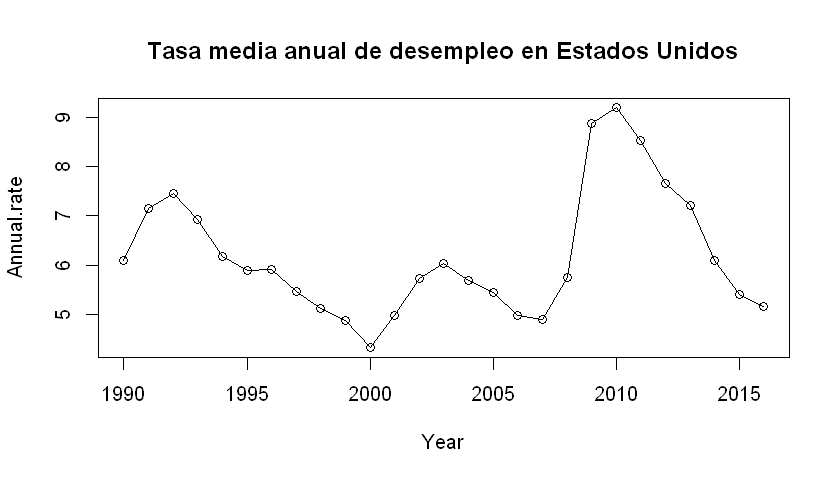

In [8]:
## Lee el archivo csv
unemp.data <- read.csv('fuentedatos/output.csv', header = TRUE, stringsAsFactors = FALSE)
# Obtener información general sobre el conjunto de datos 
str(unemp.data)
# Tasa de desempleo anual para los Estados Unidos desde 1990 hasta 2016
Annual.rate <- sapply(split(unemp.data$Rate, unemp.data$Year), mean)
Year = c(1990:2016)
plot(Year, Annual.rate,  main = "Tasa media anual de desempleo en Estados Unidos")
lines(Year, Annual.rate)

Este conjunto de datos abarca más de 3 recesiones. El país pasó por una recesión en 1990. El colapso de la burbuja de Internet y los ataques del 11 de septiembre empujaron al país a otra recesión en 2001, poco después de que George W. Bush asumiera el cargo. La crisis financiera de 2007 a 2009 dio lugar a una tercera recesión. Podemos ver el aumento correspondiente en las tasas de desempleo para estos períodos de tiempo en el gráfico anterior, el más marcado es el que muestra la reciente crisis financiera.

### Preparación del conjunto de datos para su análisis.
Este conjunto de datos tiene casi 900 mil observaciones con aproximadamente 3 mil observaciones por cada mes de cada año desde 1990 hasta 2016. A continuación, encontremos la tasa mensual promedio de desempleo para cada uno de los 27 años. Tendremos 12 observaciones por cada año de esta manera. Crearemos un conjunto de datos abreviado con estas tasas medias mensuales.

In [9]:
# Dividir en conjuntos de datos más pequeños clasificados por año
sub.1990 <- subset(unemp.data, unemp.data[,1] == 1990)
sub.1991 <- subset(unemp.data, unemp.data[,1] == 1991)
sub.1992 <- subset(unemp.data, unemp.data[,1] == 1992)
sub.1993 <- subset(unemp.data, unemp.data[,1] == 1993)
sub.1994 <- subset(unemp.data, unemp.data[,1] == 1994)
sub.1995 <- subset(unemp.data, unemp.data[,1] == 1995)
sub.1996 <- subset(unemp.data, unemp.data[,1] == 1996)
sub.1997 <- subset(unemp.data, unemp.data[,1] == 1997)
sub.1998 <- subset(unemp.data, unemp.data[,1] == 1998)
sub.1999 <- subset(unemp.data, unemp.data[,1] == 1999)
sub.2000 <- subset(unemp.data, unemp.data[,1] == 2000)
sub.2001 <- subset(unemp.data, unemp.data[,1] == 2001)
sub.2002 <- subset(unemp.data, unemp.data[,1] == 2002)
sub.2003 <- subset(unemp.data, unemp.data[,1] == 2003)
sub.2004 <- subset(unemp.data, unemp.data[,1] == 2004)
sub.2005 <- subset(unemp.data, unemp.data[,1] == 2005)
sub.2006 <- subset(unemp.data, unemp.data[,1] == 2006)
sub.2007 <- subset(unemp.data, unemp.data[,1] == 2007)
sub.2008 <- subset(unemp.data, unemp.data[,1] == 2008)
sub.2009 <- subset(unemp.data, unemp.data[,1] == 2009)
sub.2010 <- subset(unemp.data, unemp.data[,1] == 2010)
sub.2011 <- subset(unemp.data, unemp.data[,1] == 2011)
sub.2012 <- subset(unemp.data, unemp.data[,1] == 2012)
sub.2013 <- subset(unemp.data, unemp.data[,1] == 2013)
sub.2014 <- subset(unemp.data, unemp.data[,1] == 2014)
sub.2015 <- subset(unemp.data, unemp.data[,1] == 2015)
sub.2016 <- subset(unemp.data, unemp.data[,1] == 2016)

In [10]:
#Preparar los datos para el análisis de series de tiempo
# Tasa de empleo mensual promedio ordenada por año para todos los EE. UU.
mean1990 <- sapply(split(sub.1990$Rate, factor(sub.1990$Month, month.name, ordered=TRUE)), mean) 
mean1991 <- sapply(split(sub.1991$Rate, factor(sub.1991$Month, month.name, ordered=TRUE)), mean) 
mean1992 <- sapply(split(sub.1992$Rate, factor(sub.1992$Month, month.name, ordered=TRUE)), mean) 
mean1993 <- sapply(split(sub.1993$Rate, factor(sub.1993$Month, month.name, ordered=TRUE)), mean) 
mean1994 <- sapply(split(sub.1994$Rate, factor(sub.1994$Month, month.name, ordered=TRUE)), mean) 
mean1995 <- sapply(split(sub.1995$Rate, factor(sub.1995$Month, month.name, ordered=TRUE)), mean) 
mean1996 <- sapply(split(sub.1996$Rate, factor(sub.1996$Month, month.name, ordered=TRUE)), mean) 
mean1997 <- sapply(split(sub.1997$Rate, factor(sub.1997$Month, month.name, ordered=TRUE)), mean) 
mean1998 <- sapply(split(sub.1998$Rate, factor(sub.1998$Month, month.name, ordered=TRUE)), mean) 
mean1999 <- sapply(split(sub.1999$Rate, factor(sub.1999$Month, month.name, ordered=TRUE)), mean) 
mean2000 <- sapply(split(sub.2000$Rate, factor(sub.2000$Month, month.name, ordered=TRUE)), mean) 
mean2001 <- sapply(split(sub.2001$Rate, factor(sub.2001$Month, month.name, ordered=TRUE)), mean) 
mean2002 <- sapply(split(sub.2002$Rate, factor(sub.2002$Month, month.name, ordered=TRUE)), mean) 
mean2003 <- sapply(split(sub.2003$Rate, factor(sub.2003$Month, month.name, ordered=TRUE)), mean) 
mean2004 <- sapply(split(sub.2004$Rate, factor(sub.2004$Month, month.name, ordered=TRUE)), mean) 
mean2005 <- sapply(split(sub.2005$Rate, factor(sub.2005$Month, month.name, ordered=TRUE)), mean) 
mean2006 <- sapply(split(sub.2006$Rate, factor(sub.2006$Month, month.name, ordered=TRUE)), mean) 
mean2007 <- sapply(split(sub.2007$Rate, factor(sub.2007$Month, month.name, ordered=TRUE)), mean) 
mean2008 <- sapply(split(sub.2008$Rate, factor(sub.2008$Month, month.name, ordered=TRUE)), mean) 
mean2009 <- sapply(split(sub.2009$Rate, factor(sub.2009$Month, month.name, ordered=TRUE)), mean) 
mean2010 <- sapply(split(sub.2010$Rate, factor(sub.2010$Month, month.name, ordered=TRUE)), mean) 
mean2011 <- sapply(split(sub.2011$Rate, factor(sub.2011$Month, month.name, ordered=TRUE)), mean) 
mean2012 <- sapply(split(sub.2012$Rate, factor(sub.2012$Month, month.name, ordered=TRUE)), mean) 
mean2013 <- sapply(split(sub.2013$Rate, factor(sub.2013$Month, month.name, ordered=TRUE)), mean) 
mean2014 <- sapply(split(sub.2014$Rate, factor(sub.2014$Month, month.name, ordered=TRUE)), mean) 
mean2015 <- sapply(split(sub.2015$Rate, factor(sub.2015$Month, month.name, ordered=TRUE)), mean) 
mean2016 <- sapply(split(sub.2016$Rate, factor(sub.2016$Month, month.name, ordered=TRUE)), mean)

In [11]:
#Crear un marco de datos de tasas medias mensuales por año
mean.monthly.rate = data.frame('year'=c(rep(1990,12),rep(1991,12),rep(1992,12),rep(1993,12),rep(1994,12),rep(1995,12),
                         rep(1996,12),rep(1997,12),rep(1998,12),rep(1999,12),rep(2000,12),rep(2001,12),rep(2002,12),rep(2003,12),
                         rep(2004,12),rep(2005,12),rep(2006,12),rep(2007,12),rep(2008,12),rep(2009,12),rep(2010,12),
                         rep(2011,12),rep(2012,12),rep(2013,12),rep(2014,12),rep(2015,12),rep(2016,12)),
                'month' = rep(c('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'),27),
                'rate' = c(mean1990,mean1991,mean1992,mean1993,mean1994,mean1995,mean1996,mean1997,mean1998,mean1999,
                           mean2000,mean2001,mean2002,mean2003,mean2004,mean2005,mean2006,mean2007,mean2008,mean2009,
                           mean2010,mean2011,mean2012,mean2013,mean2014,mean2015,mean2016))

In [12]:
#Las primeras filas de este conjunto de datos
head(mean.monthly.rate)
str(mean.monthly.rate)

year month rate    
1 1990 Jan   7.055016
2 1990 Feb   7.123685
3 1990 Mar   6.516672
4 1990 Apr   6.006778
5 1990 May   5.614321
6 1990 Jun   5.704363

'data.frame':	324 obs. of  3 variables:
 $ year : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ month: Factor w/ 12 levels "Apr","Aug","Dec",..: 5 4 8 1 9 7 6 2 12 11 ...
 $ rate : num  7.06 7.12 6.52 6.01 5.61 ...


Exiten 324 observaciones en este nuevo conjunto de datos. Hemos reducido de casi 3k observaciones por mes por año a una observación por mes por año al tomar el promedio mensual. Este conjunto de datos ahora está listo para su posterior análisis.

### Trabajando con series de tiempo en R

R contiene varias clases de series de tiempo. En este caso, trabajaremos con la clase `ts` básica. Una clase poderosa de `zoo` proporciona más capacidades. El paquete `xts` agrega extensibilidad a la clase` zoo`. Muchas otras clases de series de tiempo R están disponibles.

Los siguientes paquetes son necesarios para su posterior análisis:

In [13]:
#Evitar mostrar warning messages
options(warn=-1)
# Cargar paquetes y funciones requeridos
require(repr)
require(forecast)

Ahora, vamos a crear un objeto de series de tiempo de clase de R ts simple para la tasa de desempleo nacional de los Estados Unidos a partir del conjunto de datos anterior.

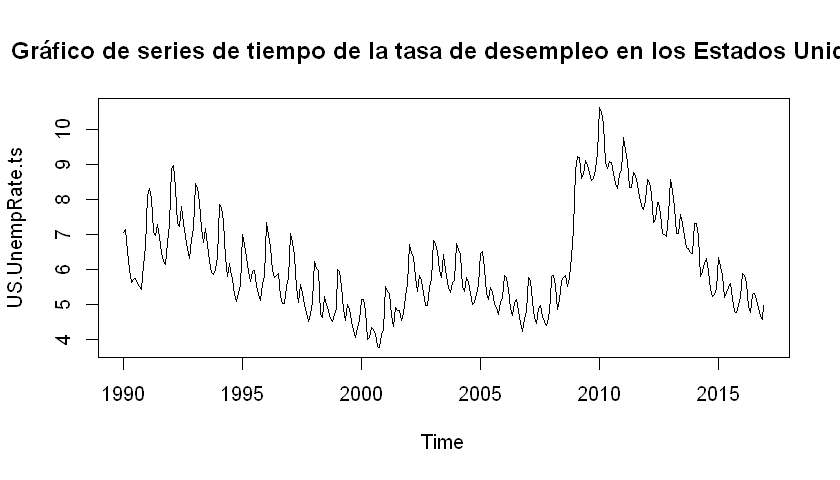

In [14]:
#Convierte a series de tiempo usando la función ts
US.UnempRate.ts <- ts(mean.monthly.rate[,3], start = 1990, freq = 12)

#Gráfico the time series
options(repr.pmales.extlot.width=8, repr.plot.height=4)
plot(US.UnempRate.ts, main = 'Gráfico de series de tiempo de la tasa de desempleo en los Estados Unidos')

Decimos que una serie de tiempo con una variación constante es **estacionaria**. Las propiedades de una serie temporal estacionaria no varían con el tiempo.

Existe un patrón **estacional** cuando una serie está influenciada por factores estacionales (por ejemplo, el trimestre del año, el mes o el día de la semana). La estacionalidad es siempre *de un período fijo y conocido*. Por lo tanto, las series temporales estacionales a veces se denominan **periódicas** series temporales.

Existe un patrón **cíclico** cuando los datos muestran subidas y caídas que *no son de período fijo*. Por ejemplo, los ciclos económicos que suelen durar varios años, pero de antemano se desconoce la duración del ciclo actual.

Existe una **tendencia** cuando hay un aumento o disminución a largo plazo en los datos. No tiene que ser lineal. A veces nos referiremos a una tendencia que "cambia de dirección" cuando podría ir de una tendencia creciente a una tendencia decreciente.

En el gráfico anterior, notamos las siguientes propiedades de esta serie de tiempo.

- Esta serie temporal tiene una tendencia significativa.
- Tiene un componente estacional.
- Tiene un patrón cíclico mostrado por el aumento y la caída de las tasas de desempleo correspondientes a las recesiones y expansiones.
- La duración del ciclo (en años) varía con el tiempo.
- El gráfico de la serie logarítmica transformada parece tener un tamaño ligeramente más uniforme para el componente estacional que el no transformado. Así que vamos a utilizar la serie de log transformado para un análisis más detallado

Cualquier serie temporal con una tendencia implica que varía con el tiempo, lo que significa que no es estacionario**.

Una serie temporal estacionaria sin patrón estacional o cíclico y sin tendencia perceptible se dice que es **independiente distribuida de manera idéntica** o **i.i.d.** An i.i.d. Las series de tiempo tienen una distribución normal con una distribución en forma de campana y una gráfica Q-Q de línea recta. Tal serie de tiempo también se llama ruido blanco.

Vamos a trazar la distribución de nuestras series de tiempo a continuación:

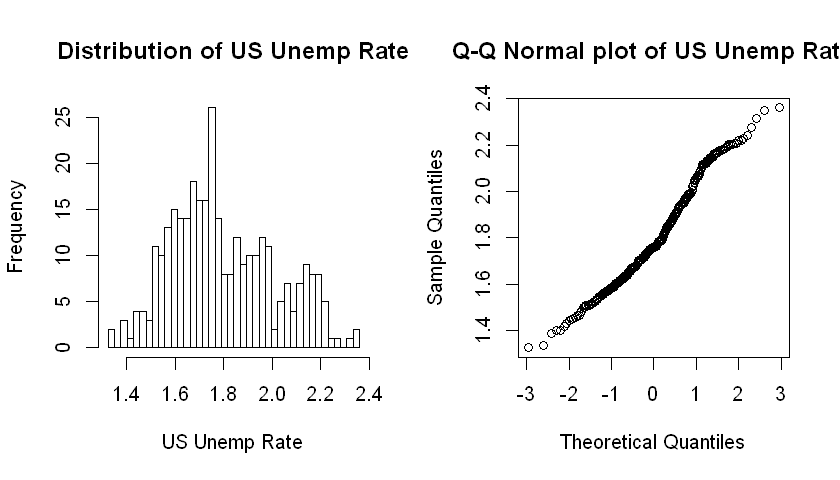

In [15]:
# Gráfico la distribución - histograma y QQ de la serie temporal
dist.ts = function(df, col = 'residual', bins = 40)
{
  par(mfrow = c(1,2))
  temp = as.vector(df)
  breaks = seq(min(temp), max(temp), length.out = (bins + 1))
  hist(temp, breaks = breaks, main = paste('Distribution of', col), xlab = col)
  qqnorm(temp, main = paste('Q-Q Normal plot of', col))
  par(mfrow = c(1,1))
}

options(repr.pmales.extlot.width=8, repr.plot.height=4)
dist.ts(log(US.UnempRate.ts), col = 'US Unemp Rate')

## Modelo de Minería de Datos

## Modelos ARIMA para la serie residual.

Ahora que hemos investigado las propiedades básicas de las series de tiempo y el método de descomposición de STL, investiguemos los modelos para tratar los residuos. Trabajaremos con lo que se conoce y los modelos **modelo autorregresivo integrado de promedio móvil** o **ARIMA**. En su núcleo, estos modelos son solo casos especiales de regresión lineal.

### Modelo Autoregresivo

Los valores de una serie de tiempo **autoregrisiva** o **AR** se determinan mediante una combinación lineal de los valores pasados. En otras palabras, el modelo AR representa la correlación serial en los valores de la serie de tiempo. Podemos escribir el valor de una serie autorregresiva o **ordenar p** o **AR (p)** series en el momento t como:

$$ x_t = \ alpha_1 x_ {t-1} + \ alpha_2 x_ {t-2} \ dots \ alpha_p x_ {t-p} + w_t $$

Un proceso AR tiene las siguientes propiedades:

- $ \ rho_0 = 1 $ siempre.
- $ p_k = \ alpha ^ k $
- Número de valores de PACF distintos de cero = p.

Los modelos AR son específicamente para **series temporales estacionarias**. Si la varianza no es constante o el componente de tendencia no se ha eliminado, los modelos AR no producirán resultados estadísticos.

### Modelo de media móvil

Para un modelo **de media móvil** o **MA**, el valor de la serie de tiempo en el tiempo `t` está determinado por una combinación lineal de términos de ruido blanco pasados. En otras palabras, el modelo de MA explica la correlación de series en términos de ruido. Podemos escribir el modelo MA (q) como la combinación lineal de los últimos términos de ruido blanco `q` $ w_i $:

$$ x_t = w_t + \ beta_1 w_ {t-1} + \ beta_2 w_ {t-2} + \ cdots + \ beta_q w_ {t-q} $$

Un proceso de MA tiene las siguientes propiedades:

- $ \ rho_0 = 1 $ siempre. (Auto correlación en el retraso 0)
- Número de $ \ rho_k distinto de cero; k \ ne 0 $ valores = q. (auto correlación en el retraso k)

Los modelos MA son específicamente para **series de tiempo estacionarias**. Si la varianza no es constante o el componente de tendencia no se ha eliminado, los modelos MA no producirán resultados estadísticos.

### El modelo de media móvil autoregresivo

Podemos combinar los modelos AR y MA para crear un **modelo de media móvil autorregresiva** o **ARMA**. Este modelo explica la correlación serial tanto en términos de ruido como en valores. Podemos escribir un modelo ARMA de orden `(p, q)` como:

$$ x_t = \ alpha_1 x_ {t-1} + \ alpha_2 x_ {t-2} \ dots \ alpha_p x_ {t-p}
w_t + \ beta_1 w_ {t-1} + \ beta_2 w_ {t-2} + \ cdots + \ beta_q w_ {t-q} $$

### Modelo de media móvil integrada autoregresiva

El modelo **de media móvil integrada autorregresiva**, o **ARIMA** agrega un término integrador al modelo ARMA. El componente de integración realiza la diferenciación para modelar un componente de paseo aleatorio. El componente integrante modela una de las **partes no estacionarias** de una serie de tiempo. El modelo ARIMA está definido por órdenes p, d, q. El orden del operador de diferenciación del término integrador está definido por `d`.

Ahora, intentemos estimar los parámetros ARIMA (p, d, q) de la serie de tiempo (recuerde, esta es una serie de tiempo no estacionaria) e imprimimos un resumen del mejor modelo y trazamos el ACF y el PACF del residual.

In [17]:
#ARIMA model estimation for STL remainder
ts.model = function(ts, col = 'remainder', order = c(0,0,1))
{
  mod = arima(ts, order = order, include.mean = FALSE)
  print(mod)
  mod
}

arima.estimate1 <- ts.model(US.UnempRate.ts, order = c(1,0,1))#ARIMA(1,0,1) model
arima.estimate2 <- ts.model(US.UnempRate.ts, order = c(0,1,1))#ARIMA(0,1,1) model
arima.estimate3 <- ts.model(US.UnempRate.ts, order = c(1,1,3))#ARIMA(1,1,3) model 
arima.estimate4 <- ts.model(US.UnempRate.ts, order = c(0,1,5))#ARIMA(0,1,5) model
arima.estimate5 <- ts.model(US.UnempRate.ts, order = c(2,1,3))#ARIMA(2,1,3) model
arima.estimate6 <- ts.model(US.UnempRate.ts, order = c(3,0,4))#ARIMA(3,0,4) model
arima.estimate7 <- ts.model(US.UnempRate.ts, order = c(4,0,5))#ARIMA(4,0,5) model
arima.estimate8 <- ts.model(US.UnempRate.ts, order = c(4,1,5))#ARIMA(4,1,5) model


Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1     ma1
      0.9955  0.2653
s.e.  0.0040  0.0475

sigma^2 estimated as 0.2168:  log likelihood = -214.7,  aic = 435.41

Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ma1
      0.2641
s.e.  0.0475

sigma^2 estimated as 0.2173:  log likelihood = -211.82,  aic = 427.65

Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1      ma1     ma2      ma3
      0.3497  -0.1401  0.0610  -0.5354
s.e.  0.0801   0.0674  0.0632   0.0465

sigma^2 estimated as 0.1668:  log likelihood = -169.58,  aic = 349.16

Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ma1     ma2      ma3      ma4     ma5
      0.2511  0.1221  -0.4791  -0.3755  0.0970
s.e.  0.0593  0.0544   0.0388   0.0533  0.0533

sigma^2 estimated as 0.1563:  log likelihood = -159.54,  aic = 331.08

Call:
arima(x = ts, order = order, include.mean = FALSE)

Coeffi